## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question 1**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





Text(0.5, 0.98, '')

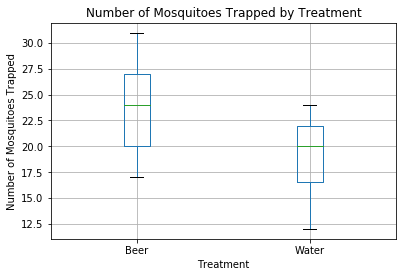

In [52]:
#Question 1

#Load key libraries 
import pandas as pd
import matplotlib.pyplot as plt

#Import dataset and examine first few rows
mosquito = pd.read_csv("mosquitos_data.csv")
mosquito.head()

#Create boxplot chart to compare beer treatment vs. water treatment groups
bp=mosquito.boxplot(by='Treatment')
bp.set_xlabel("Treatment")
bp.set_ylabel("Number of Mosquitoes Trapped")
bp.set_title("Number of Mosquitoes Trapped by Treatment")
plt.suptitle('')

In [ ]:
#Interpretation of the graph

#The median number of mosquitoes attracted to participants in the "beer" group is significantly higher than in the "water"
#group (as illustrated by the horizontal bars in the middle of each box), and by the descriptive statistics below (median 
#of 24 vs 20). This is the first piece of evidence that shows an association between beer consumption and mosquito attraction.

#There is also a difference of approximately 4.4 between the groups' two means, providing furhter evidence of the association

#To me, the greatest piece of evidence in favour of the association is that the minimum number of mosquitoes attracted by 
#any single participant in the beer group (illustrated by the lower horizontal bar at y=~ 17) is greater than the first 
#quartile value of the water group (illustrated by the lower horizontal bar of the box). This means that roughly 25%
#of participants in the "water" group had fewer numbers of mosquitoes attracted to them than the lowest observation in the
#beer group. We see a similar pattern on the upper end as well, where the "water" group maximum is approximately equal to the
#"beer" group median.

In [4]:
#Calculate means of each treatment group
mosquito.groupby('Treatment')['Response'].mean()

Treatment
Beer     23.600000
Water    19.222222
Name: Response, dtype: float64

In [ ]:
#On average, participants in the "beer" group attracted 23.6 mosquitoes, while participants in the "water" group attracted 19.2
#mosquitoes. This suggests there is in fact a difference in terms of mosquito attractiveness between the two groups.

In [5]:
#Calculate medians of each treatment group
mosquito.groupby('Treatment')['Response'].median()

Treatment
Beer     24
Water    20
Name: Response, dtype: int64

In [ ]:
#The median values tell a similar story to the mean values (i.e. there appears to be an association between beer consumption 
#and mosquito attractiveness). In this analysis, there is little difference between the mean and median values between groups
#(Beer: 24 vs. 23.6; Water: 19.22 vs. 20). This suggests the data does not contain many outliers, as the mean is senstiive to
#outliers while the median is not.

In [6]:
#Calculate standard deviations of each treatment group
mosquito.groupby('Treatment')['Response'].std()

Treatment
Beer     4.133199
Water    3.671120
Name: Response, dtype: float64

In [ ]:
#The standard deviation measures the variation within a sample of data; based on the values above, we see that there the "beer"
#group is a little more spread out than the water group, suggesting that exposure to beer has somewhat less of a predictable 
#effect on mosquito attractiveness than exposure to water.

In [8]:
%pip install mlxtend #Required for question 2

Note: you may need to restart the kernel to use updated packages.


In [34]:
#Question 2

#To replicate John Rauser's method, the first step is to split the dataset into two groups based on the treatment
df_beer = mosquito[mosquito['Treatment']=='Beer']
df_water = mosquito[mosquito['Treatment']=='Water']

#Extract just the response column (i.e. the values that will be resampled) from each dataset
beer = df_beer.loc[:, "Response"]
water = df_water.loc[:, "Response"]

#The next step is to perform resampling using a random permutation test method (I will use the permutation_test function from
#the mlxtend.evaluate package)
import mlxtend.evaluate as mle

#To compute the probability that the results we obtained occurred strictly by chance (i.e. there is no 
#meaningful difference between the treatment groups), a p-value can be computed from 50,000 simulations (same number as video)
#Note: the approximate method is used here to reduce the computation time of the simulation
p_value = mle.permutation_test(beer, water, method='approximate', num_rounds=50000, seed=0)
print(p_value)

0.00108


In [53]:
#When the seed is changed, the p-value changes slightly (in the example below, it decreases), and remains well below the 0.01 
#threshold (the value required to reject the null at a 99% confidence level)

#For example
p_value_2 = mle.permutation_test(beer, water, method='approximate', num_rounds=50000, seed=110)
print(p_value_2)

0.00078


In [31]:
#Based on the p-value of 0.00108 (or 0.00078), we can conclude that it is extremely unlikely to have obtained these results by 
#chance
#A p-value of 0.00108 from 50,000 observations translates into roughly 54 occurrences where results of the simulation were
#just as extreme (or more extreme) than the difference in means of approximately 4.4 between the two groups
#Thus, we can safely say that beer consumption increases human attractiveness to mosquitoes